[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/3/W3.ipynb)


 ## Method of Generating Random Variables


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# The Acceptance-Rejection Method (3.3)

Suppose that $X$ and $Y$ are random variables with density or pmf $f$ and $g$,
respectively, and there exists a constant c such that
$ f (t) /g(t) ≤c $

for all t such that $f (t) > 0$. Then the acceptance-rejection method (or rejection
method) can be applied to generate the random variable X.



1. Find a random variable Y with density g satisfying $f (t)/g(t) ≤ c$, for
all t such that $f (t) > 0$. Provide a method to generate random Y.
2. For each random variate required:

(a) Generate a random $y$ from the distribution with density $g$.

(b) Generate a random $u$ from the $Uniform(0, 1)$ distribution.

(c) If $u < f (y)/(cg(y))$, accept $y$ and deliver $x = y$; otherwise reject $y$
and repeat from Step 2a.



# Example 3.7 (Acceptance-rejection method):

#Suppose we would like to draw samples from $\beta(2,2)$ distribution.
# Where $\beta_{\chi}(2,2) = 6x(1-x)$.


In [9]:
### cheap way to sample from U(0,1) is np.random.rand()
def return_sample(n:int)->list:
  sample_list = []
  for i in range(n):
    for j in range(n):
      u = np.random.rand() ### sample for u
      x = np.random.rand()  ### sample from g (in this case uniform distribution)
      if u < x*(1-x):
        sample_list.append(x)
      else:
        continue
  return np.array(sample_list)  

In [14]:
sample = return_sample(1000)  ### this guy should be from beta(2,2)

In [23]:
len(sample)

166236

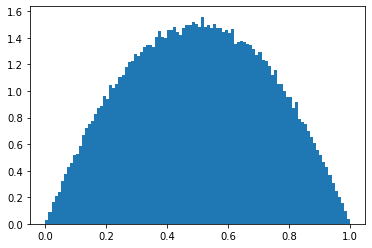

In [15]:
plt.hist(sample, bins = 100, density = True);

In [17]:
beta_twotwo = stats.beta(2,2)

In [24]:
real_sample = beta_twotwo.rvs(166236)

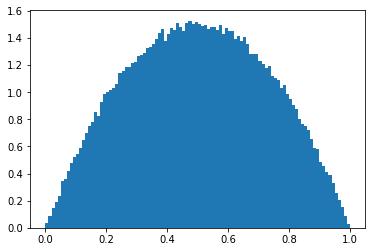

In [25]:
plt.hist(real_sample, bins = 100, density = True);

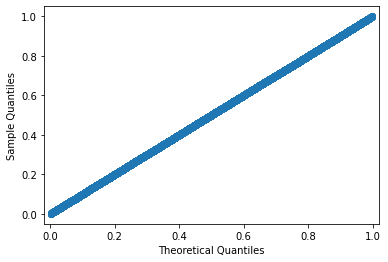

In [30]:
qqplot(sample, beta_twotwo);

# 3.4 Transformation Methods

In [32]:
np.random.choice(["2","3","4"]) ### we will get t distribution outa standard normal and chi^2 distribution

'3'

#The formula
## $T = \frac{Z}{\sqrt{V/m}}$ where $Z \in N(0,1)$ and $V \in \chi^2(m)$.
## Presumably we will have $T \sim t(m)$ t-distribution with m degrees of freedom.

In [38]:
def sample_m(n:int, m:int = 100) -> list:
  s_n = lambda : np.random.randn()
  x_n = lambda : np.random.chisquare(m)
  return np.array([s_n()/(x_n()/m)**0.5 for i in range(n) for j in range(n)])

In [54]:
f = lambda  : 2

In [59]:
[i**2 for i in range(10)]  ### this is the same as below
L = []
for i in range(10):
  L.append(i)


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

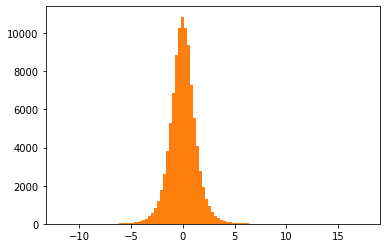

In [47]:
plt.hist(sample_m(100, m = 5), bins = 100);
plt.hist(np.random.standard_t(df = 5, size = 100000), bins = 100);
### these dudes are the same, at least as much as we can see!!!!!